In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBatter/CAPSTONE PROJECT/Capstone -2 (Linear Regression Bikesharing)/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=[0])

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [6]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [9]:
df.describe().style.background_gradient()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

In [11]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [12]:
pd.options.display.float_format = '{:,.2f} %'.format
print((df.isnull().sum()/len(df))*100)
pd.options.display.float_format = '{:,.2f}'.format

Date                    0.00 %
Rented Bike Count       0.00 %
Hour                    0.00 %
Temperature             0.00 %
Humidity                0.00 %
Wind speed              0.00 %
Visibility              0.00 %
Dew point temperature   0.00 %
Radiation               0.00 %
Rainfall                0.00 %
Snowfall                0.00 %
Seasons                 0.00 %
Holiday                 0.00 %
Functioning Day         0.00 %
dtype: float64


In [13]:
import missingno as msno

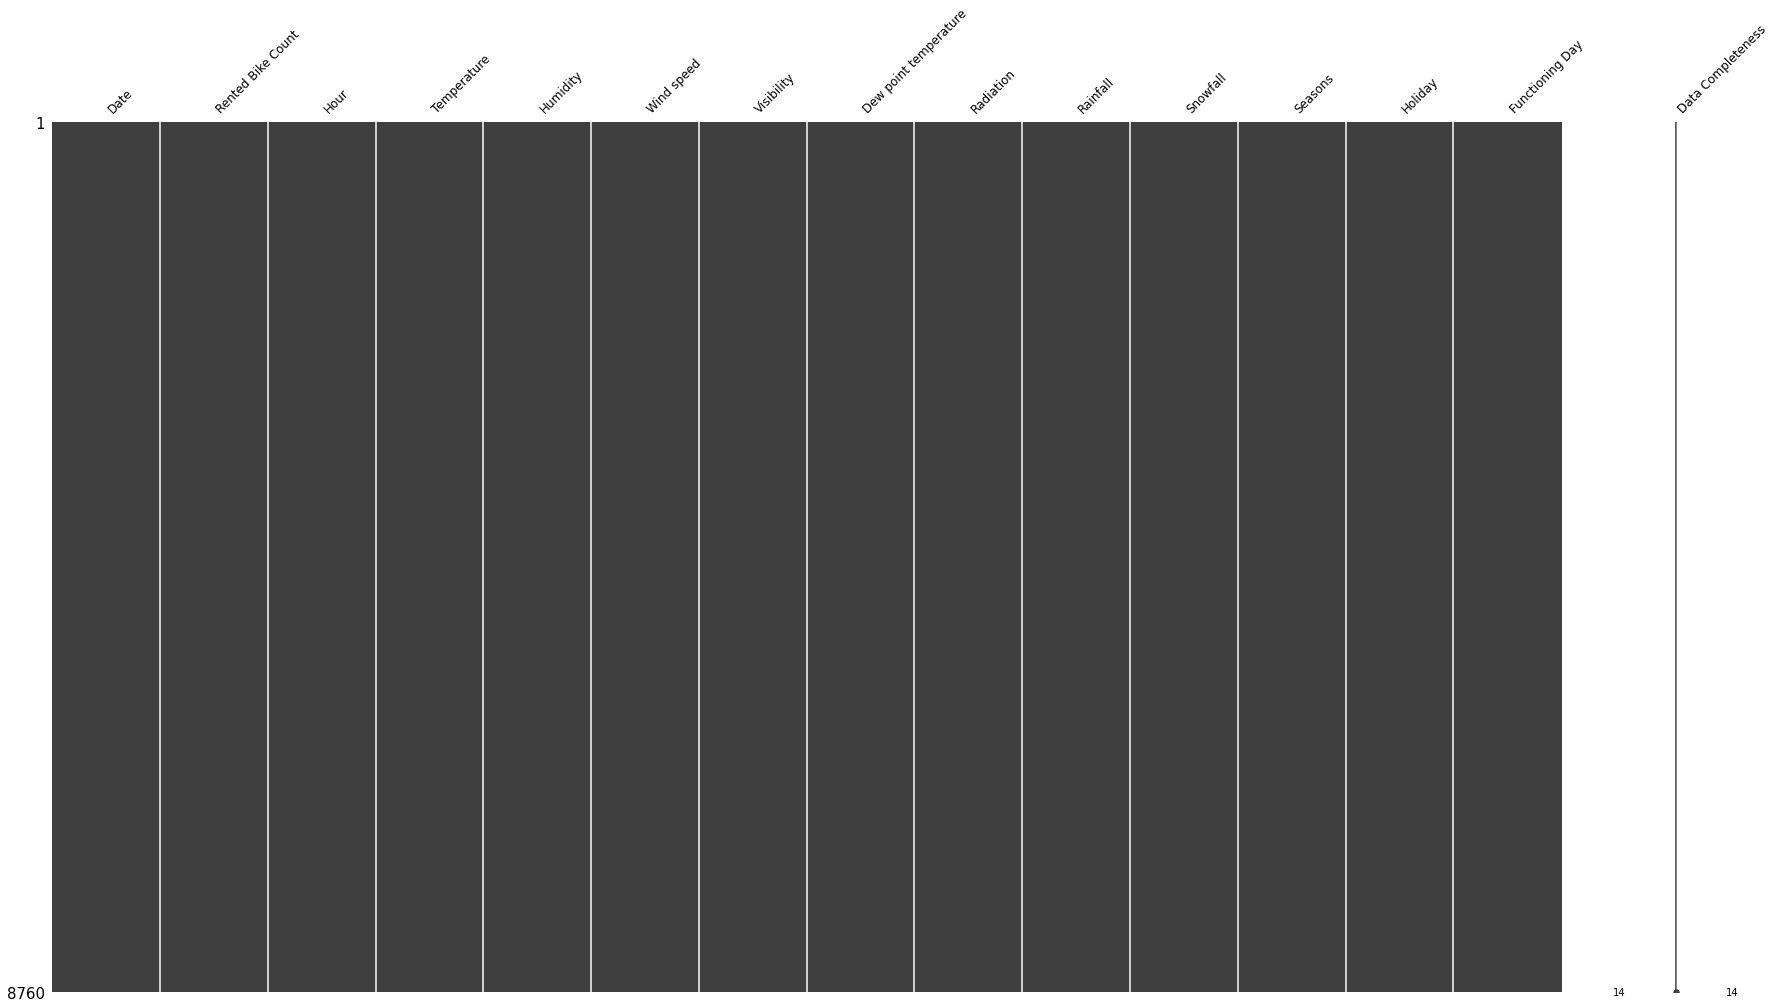

In [14]:
msno.matrix(df,labels=[df.columns],figsize=(30,16),fontsize=12)

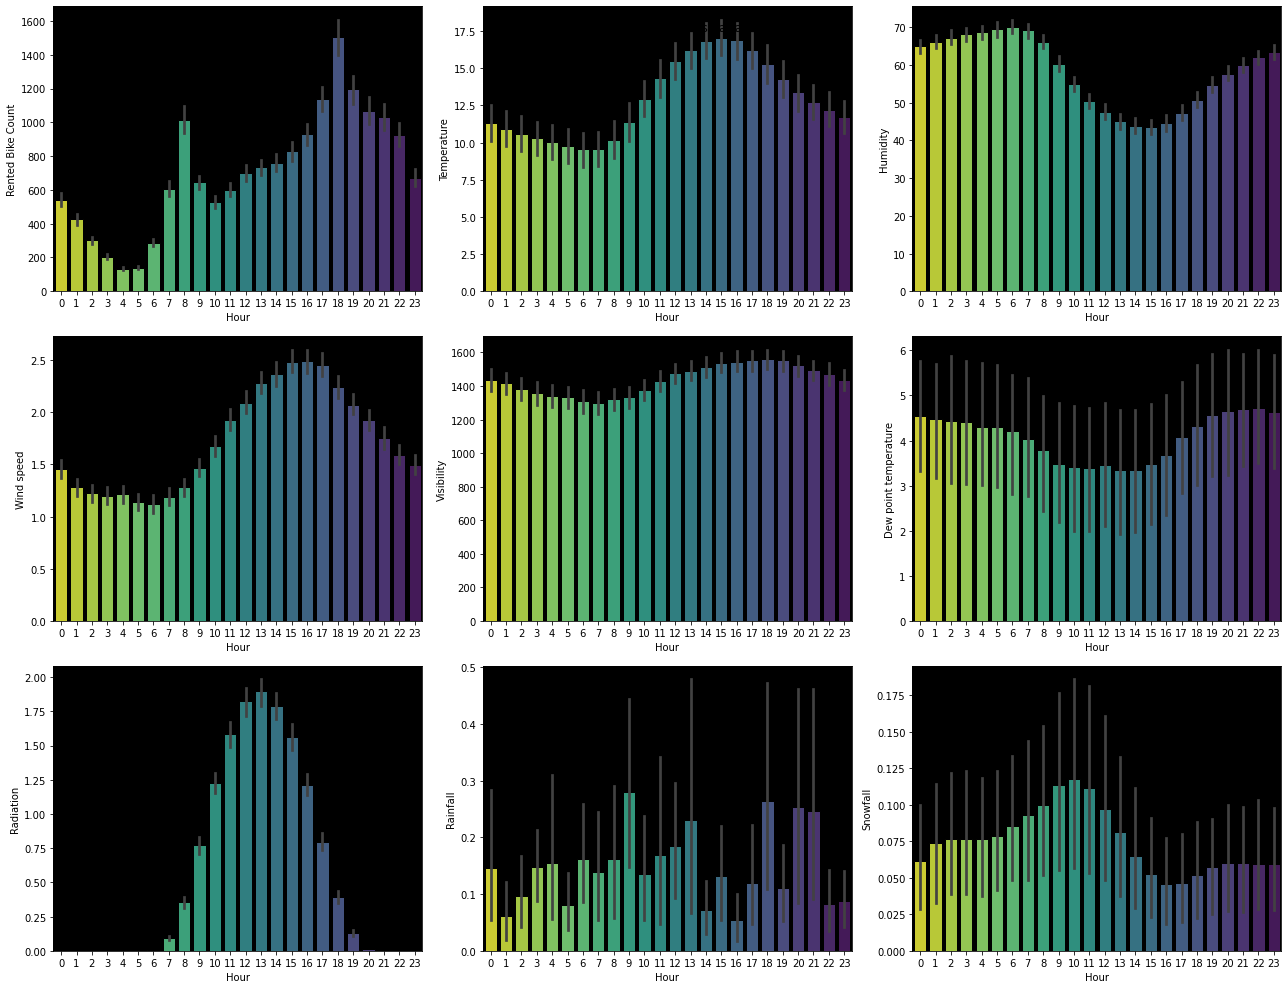

In [15]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

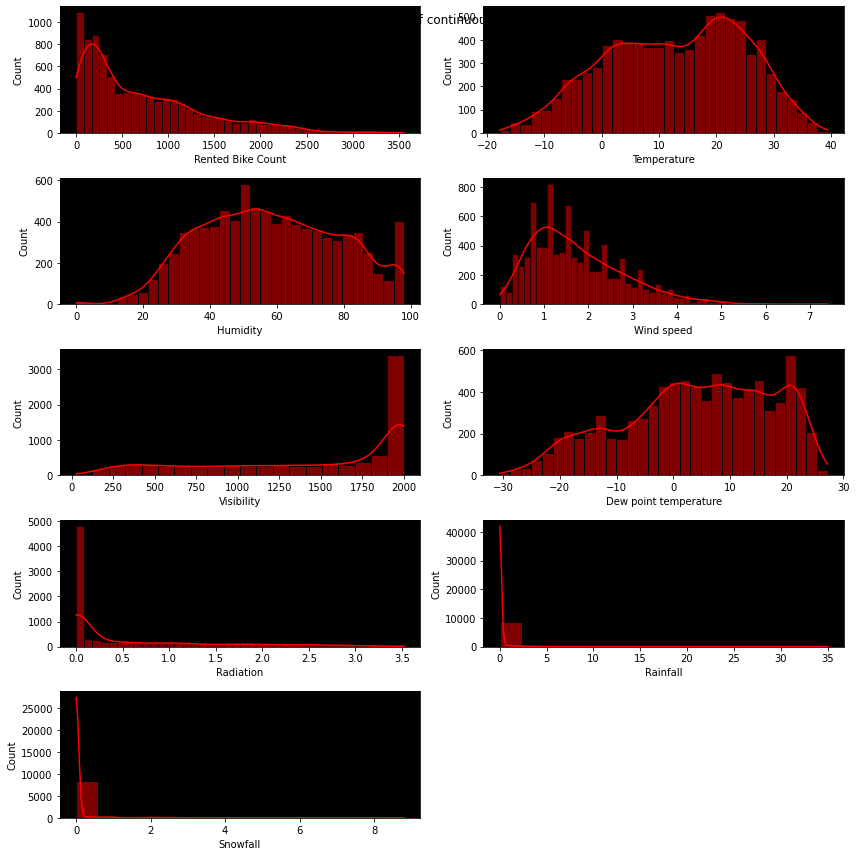

In [16]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [17]:
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [18]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

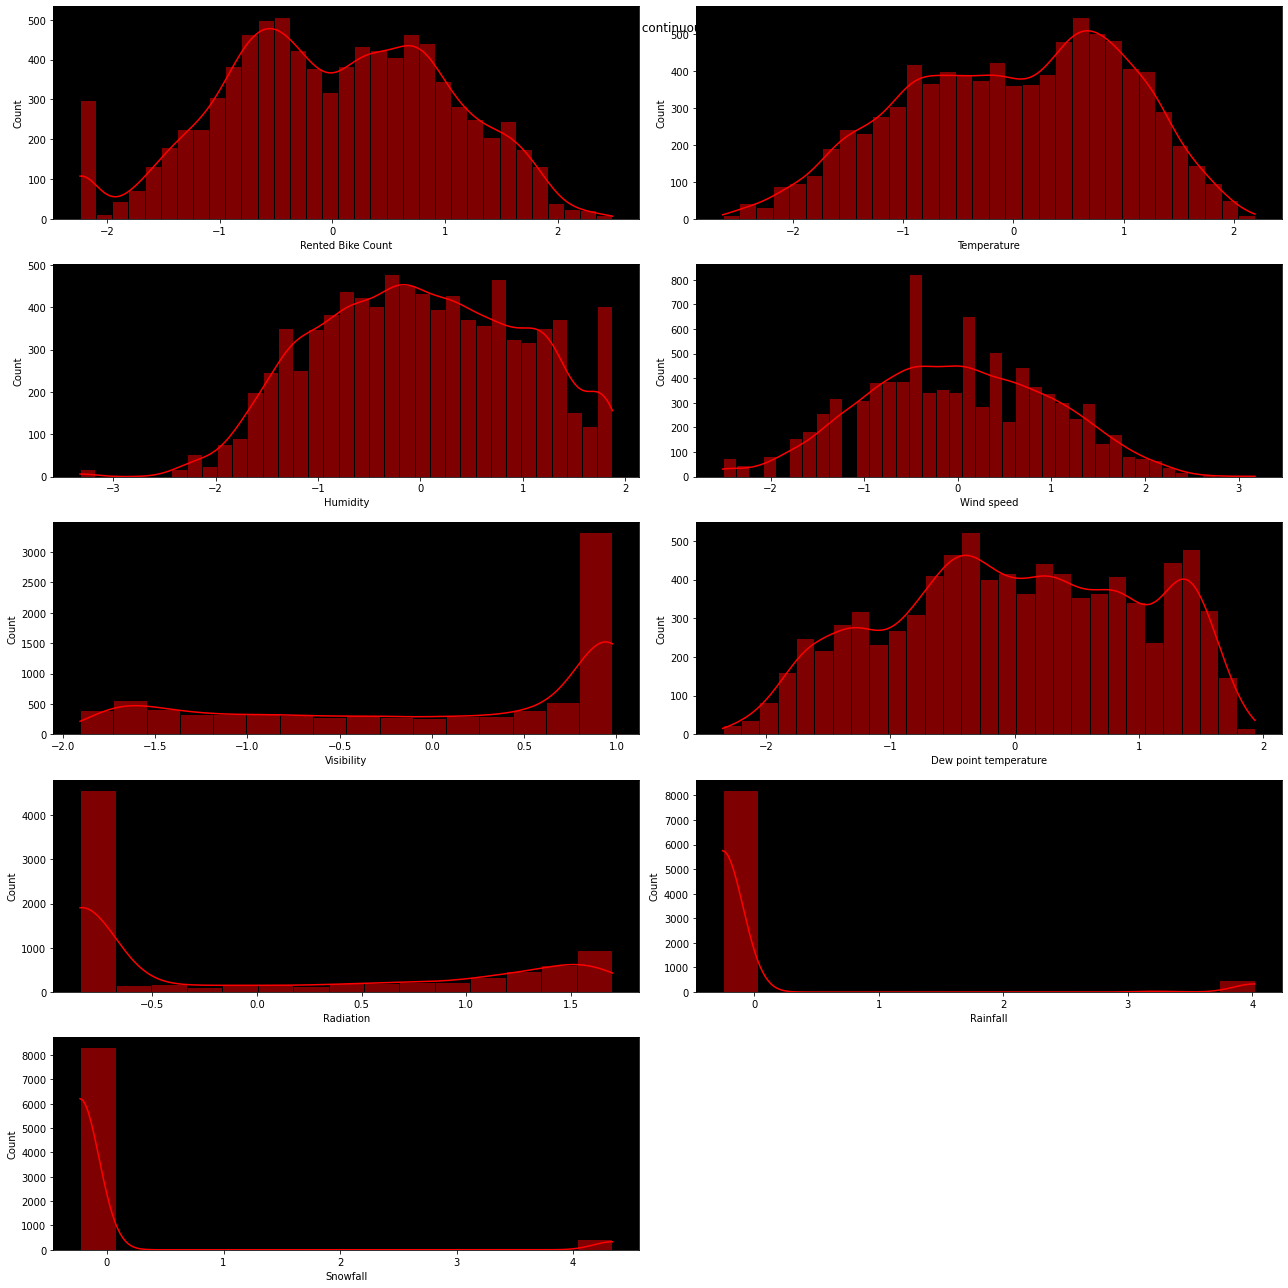

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

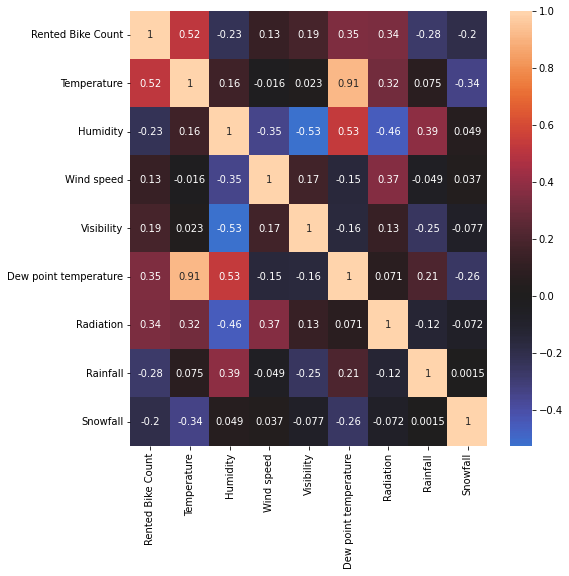

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

In [23]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [24]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [25]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.79
1,Humidity,12.01
2,Wind speed,1.23
3,Visibility,1.56
4,Dew point temperature,60.27
5,Radiation,1.86
6,Rainfall,1.20
7,Snowfall,1.17


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.79
1,Humidity,12.01
2,Wind speed,1.23
3,Visibility,1.56
4,Dew point temperature,60.27
5,Radiation,1.86
6,Rainfall,1.20
7,Snowfall,1.17


In [28]:
del X['Dew point temperature']

In [29]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,1.56
1,Humidity,2.44
2,Wind speed,1.23
3,Visibility,1.50
4,Radiation,1.83
5,Rainfall,1.19
6,Snowfall,1.16


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [31]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7f010857d320>)

In [32]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

Temperature : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_1 : 0.27%
Hour_2 : 0.91%
Hour_3 : 1.95%
Hour_4 : 3.25%
Hour_5 : 3.11%
Hour_6 : 1.15%
Hour_7 : 0.02%
Hour_8 : 0.47%
Hour_9 : 0.00%
Hour_10 : 0.05%
Hour_11 : 0.00%
Hour_12 : 0.04%
Hour_13 : 0.08%
Hour_14 : 0.11%
Hour_15 : 0.21%
Hour_16 : 0.39%
Hour_17 : 0.93%
Hour_18 : 2.18%
Hour_19 : 0.97%
Hour_20 : 0.56%
Hour_21 : 0.49%
Hour_22 : 0.28%
Hour_23 : 0.00%


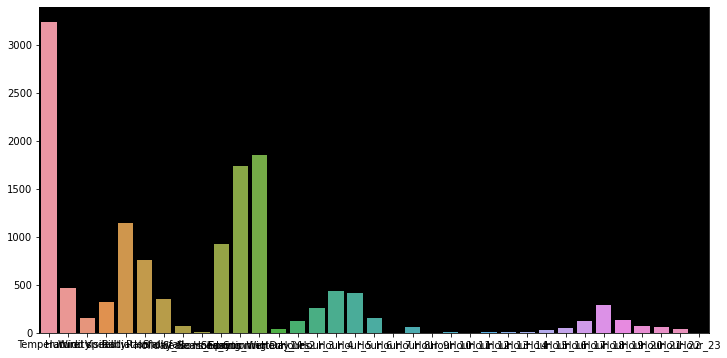

In [33]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [50]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


In [51]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                        0.00
Time:                        17:25:30   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

In [52]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [53]:
np.mean(residuals)

0.010699177021444194

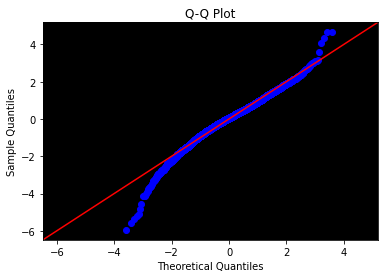

In [54]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

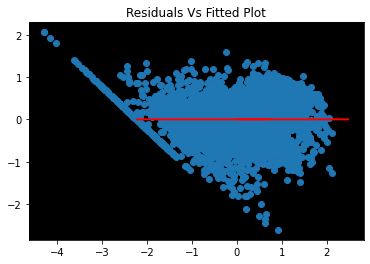

In [55]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()